Data Analytics on Traffic Accidents in Pennsylvania and California
---

In [1]:
# importing libraries

import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# reading CSV files

data = pd.read_csv("US_Accidents_March23.csv")

## Exploratory Data Analysis and Data Cleaning

In [3]:
# displaying all the columns in the dataset to have a better understanding

pd.set_option('display.max_columns', None)

data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.shape

(7728394, 46)

In [5]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
# checking for any NaN items which might be needed to either be dropped or filled accordingly

data.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

We will be cleaning our null values once we have explored the dataset a little more

In [7]:
data.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [8]:
# going through each data column and seeing how many unique values it has

data.nunique()

ID                       7728394
Source                         3
Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2428358
Start_Lng                2482533
End_Lat                  1568172
End_Lng                  1605789
Distance(mi)               22382
Description              3761578
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Airport_Code                2045
Weather_Timestamp         941331
Temperature(F)               860
Wind_Chill(F)               1001
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Wind_Speed(mph)              184
Precipitation(in)            299
Weather_Condition            144
Amenity                        2
Bump      

In [9]:
# List of columns with high amount of missing values (>20%)

data.columns[(100*data.isnull().sum()/data.shape[0]).round(2)>20].tolist()

['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)']

'End_Lat', 'End_Lng', 'Wind_Chill(F)', and 'Precipitation(in)' are the attributes with more than 20% null values so we will be deleting them.

In [10]:
data.drop(columns=['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], inplace=True)

In [11]:
# Checking if we still have missing values per attribute in our dataset

data.columns[(100*data.isnull().sum()/data.shape[0])>0].tolist()

['Description',
 'Street',
 'City',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [12]:
# Setting wind speed as 0 where Wind Direction is 'Calm'

data.loc[data['Wind_Direction'] == 'Calm', 'Wind_Speed(mph)'] = 0

In [13]:
# Checking if we still have missing values in the attribute 'Wind_Speed(mph)'

(100*data['Wind_Speed(mph)'].isnull().sum()/data.shape[0]).round(2)

2.62

In [14]:
# Dropping all rows with missing values

data.dropna(inplace=True)

In [15]:
# Converting datatype for attributes related to datetime

data["Start_Time"]= pd.to_datetime(data["Start_Time"]) 
data["End_Time"]= pd.to_datetime(data["End_Time"])
data["Weather_Timestamp"]= pd.to_datetime(data["Weather_Timestamp"])

In [16]:
# Dropping any duplicate values from the dataset

data.drop_duplicates(inplace=True)

In [17]:
data['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'Variable', 'North', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [18]:
# Adding consistency in Wind Direction

data['Wind_Direction'].replace({'North': 'N'}, inplace=True)
data['Wind_Direction'].replace({'East': 'E'}, inplace=True)
data['Wind_Direction'].replace({'West': 'W'}, inplace=True)
data['Wind_Direction'].replace({'South': 'S'}, inplace=True)
data['Wind_Direction'].replace({'VAR': 'Variable'}, inplace=True)
data['Wind_Direction'].replace({'CALM': 'Calm'}, inplace=True)

In [19]:
data['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'W', 'NNW', 'NNE', 'S',
       'Variable', 'N', 'SE', 'SSE', 'ESE', 'E', 'NE', 'ENE'],
      dtype=object)

In [20]:
# Dropping any values which might have its End_Time less than Start_Time as it makes no sense

data.drop(data[data['End_Time']<data['Start_Time']].index, inplace=True)

In [21]:
data.drop(columns=['Country'], inplace=True)
data.drop(columns=['Turning_Loop'], inplace=True)
data.drop(columns=['ID'], inplace=True)

In [22]:
# Adding a new attribute which would calculate the Total time from start till the accident

data.insert(4,'Time_Duration(min)',(data['End_Time']-data['Start_Time'])//np.timedelta64(1,'m'))

In [23]:
data['Time_Duration(min)'].describe()

count    7.414154e+06
mean     4.323413e+02
std      1.330666e+04
min      1.000000e+00
25%      3.100000e+01
50%      7.400000e+01
75%      1.240000e+02
max      2.812939e+06
Name: Time_Duration(min), dtype: float64

In [24]:
data.drop(columns=['End_Time'], inplace=True)

In [25]:
# Breaking Down Start Time according to Year, Month, Day, Hour, Minute, and Weekday

data['Year']=data['Start_Time'].dt.year
data['Month']=data['Start_Time'].dt.month
data['Day']=data['Start_Time'].dt.day
data['Hour']=data['Start_Time'].dt.hour
data['Minute']=data['Start_Time'].dt.minute
data['Weekday']=data['Start_Time'].dt.weekday

def weekday_text(w):
    d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    return d[w]
data['Weekday']=data['Weekday'].apply(lambda x:weekday_text(x))

In [26]:
data.drop(columns=['Start_Time'], inplace=True)

In [27]:
print('Percentage of Missing values:\n\n',(100*data.isnull().sum()/data.shape[0]).round(2))

Percentage of Missing values:

 Source                   0.0
Severity                 0.0
Time_Duration(min)       0.0
Start_Lat                0.0
Start_Lng                0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calming          0.0
Traffic_Sig

In [28]:
data.columns

Index(['Source', 'Severity', 'Time_Duration(min)', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Weekday'],
      dtype='object')

C:\Users\shash\AppData\Local\Temp\ipykernel_8924\1438794885.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = severity_data.corr()


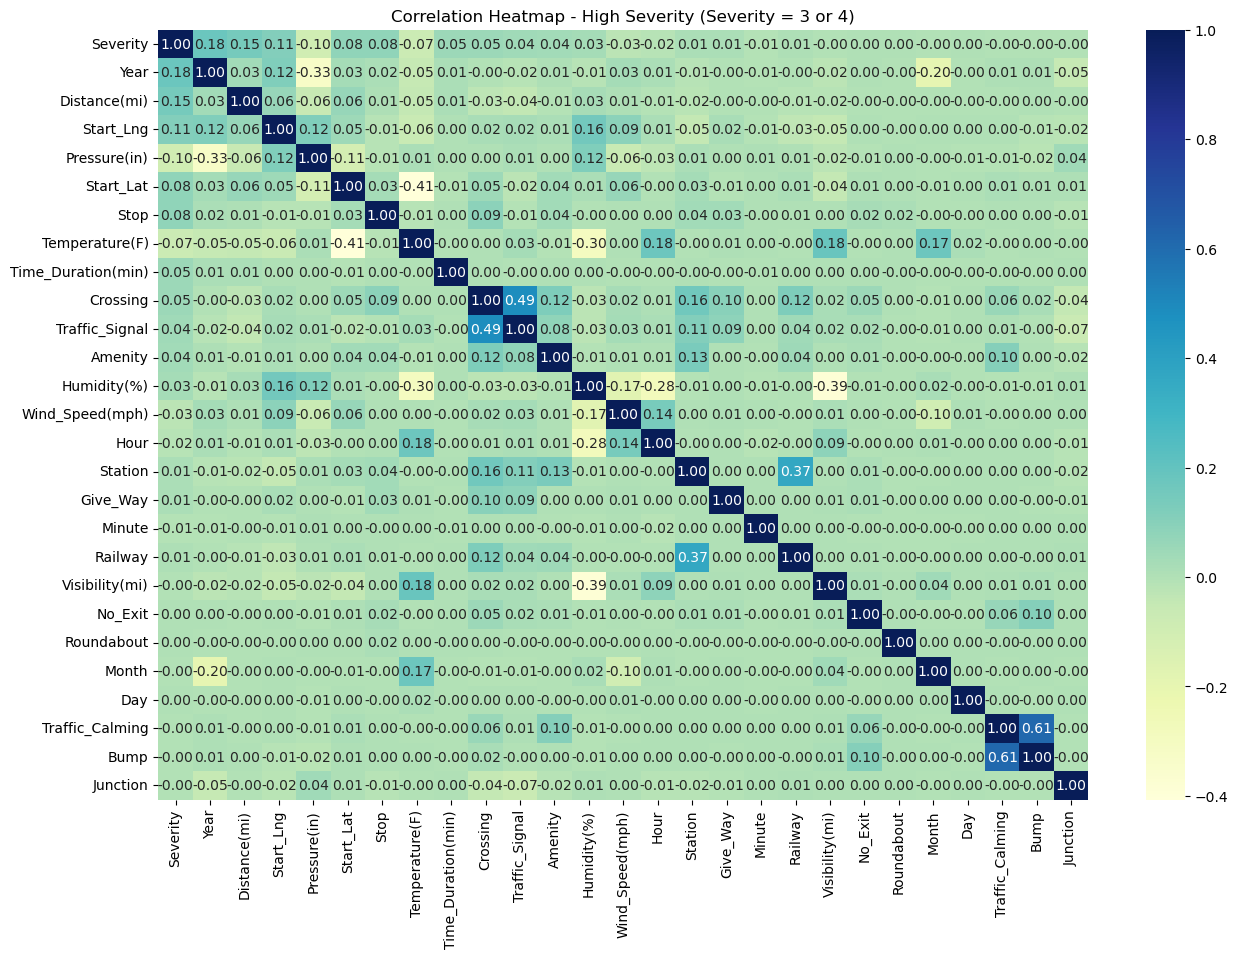

In [29]:
import seaborn as sns

# get correlation matrix
severity_data = data[(data['Severity'] == 3) | (data['Severity'] == 4)]

# Get the correlation matrix for 'Severity' equal to 3 or 4
correlation_matrix = severity_data.corr()

# Sort features by their correlation with 'Severity'
sorted_features = correlation_matrix['Severity'].abs().sort_values(ascending=False).index

# Create a heatmap with sorted features
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.loc[sorted_features, sorted_features], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap - High Severity (Severity = 3 or 4)')
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_8924\1504614413.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = severity_data.corr()


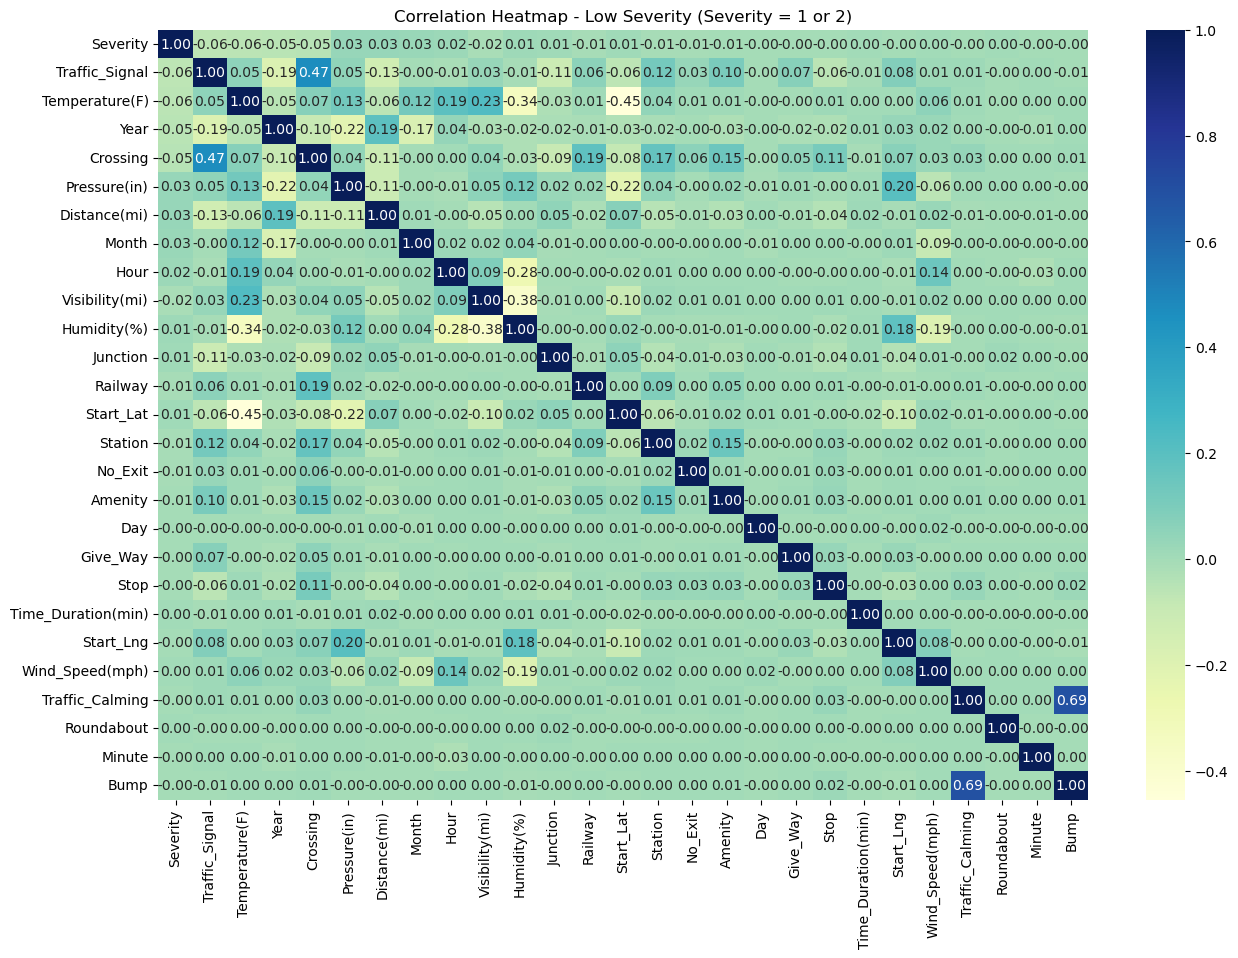

In [30]:
# get correlation matrix
severity_data = data[(data['Severity'] == 1) | (data['Severity'] == 2)]

# Get the correlation matrix for 'Severity' equal to 1 or 2
correlation_matrix = severity_data.corr()

# Sort features by their correlation with 'Severity'
sorted_features = correlation_matrix['Severity'].abs().sort_values(ascending=False).index

# Create a heatmap with sorted features
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.loc[sorted_features, sorted_features], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap - Low Severity (Severity = 1 or 2)')
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_8924\3911187191.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = severity_data.corr()


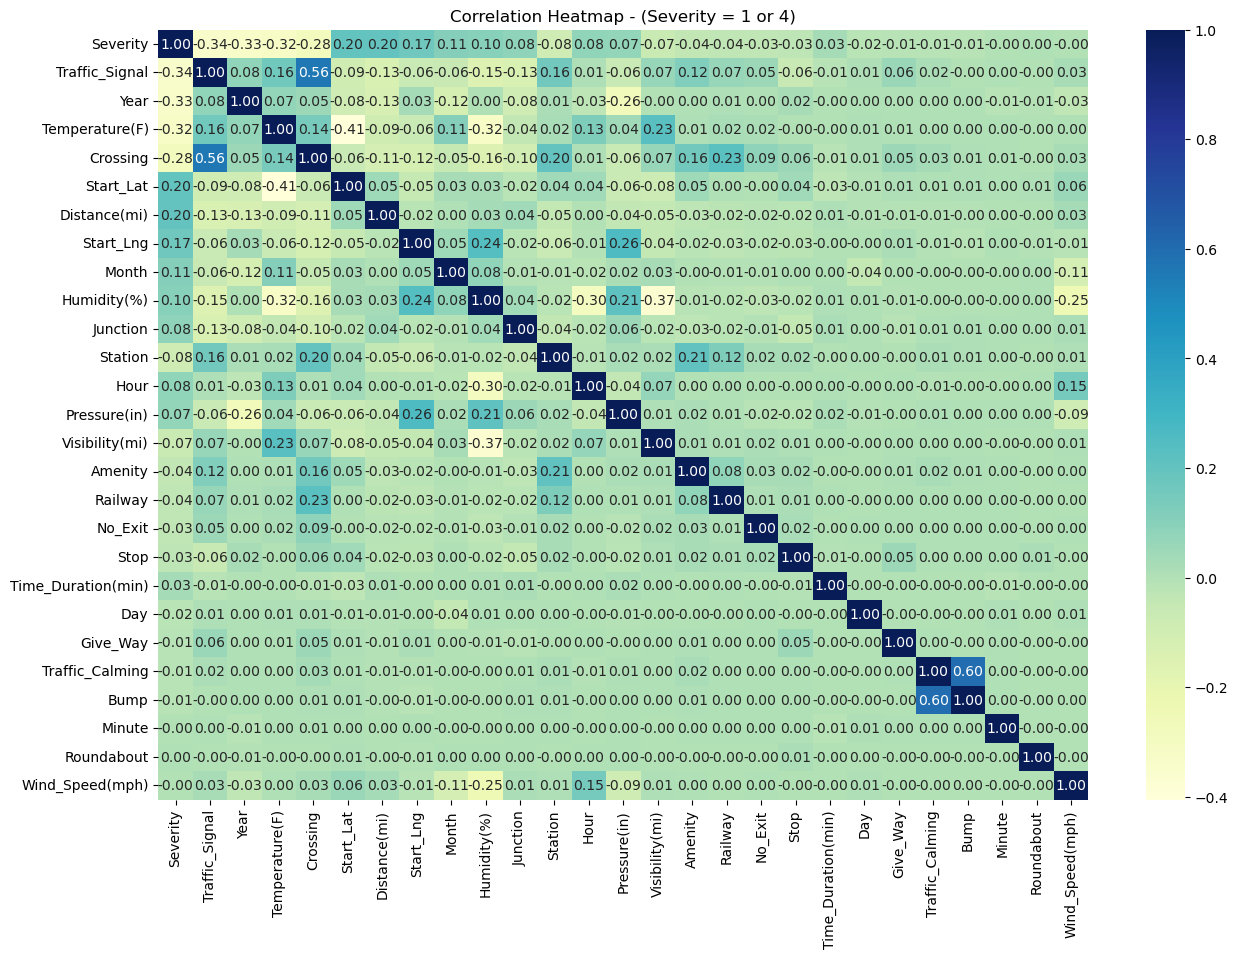

In [31]:
# get correlation matrix
severity_data = data[(data['Severity'] == 1) | (data['Severity'] == 4)]

# Get the correlation matrix for 'Severity' equal to 1 or 4
correlation_matrix = severity_data.corr()

# Sort features by their correlation with 'Severity'
sorted_features = correlation_matrix['Severity'].abs().sort_values(ascending=False).index

# Create a heatmap with sorted features
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.loc[sorted_features, sorted_features], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap - (Severity = 1 or 4)')
plt.show()

Now that we have cleaned our data, we will now be using only a select columns that we feel should matter in predicting the severity of accidents in select states.

In [32]:
# Columns we will be using for our prediction

cols = [
        'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)',
        'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition',
        'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 
        'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 
        'Year', 'Month', 'Day', 'Hour', 'Minute','Weekday', 
]

In [33]:
# We will be looking into the Commenwealth of Pensylvania and the State of California for our different Prediction Models

data[data['State']=='PA'][cols].to_csv("data_PA.csv", index=False)
data[data['State']=='CA'][cols].to_csv("data_CA.csv", index=False)

## Building our Prediction Models and Comparing the two States

### Building Model for Pensylvania

In [34]:
# Deleting all data and reloading all the necessary libraries again

%reset -f

import pandas as pd
import numpy as np

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
result = {}
state='PA'
result['State']=state
processed_data = pd.read_csv(f'data_{state}.csv').dropna()
cols = processed_data.select_dtypes(include='object').columns

In [36]:
# Separate majority and minority classes
df_s1 = processed_data[processed_data['Severity']==1]
df_s2 = processed_data[processed_data['Severity']==2]
df_s3 = processed_data[processed_data['Severity']==3]
df_s4 = processed_data[processed_data['Severity']==4]

count = max(df_s1.count()[0], df_s2.count()[0], df_s3.count()[0], df_s4.count()[0])

# Upsample minority class
df_s1 = resample(df_s1, replace=df_s1.count()[0]<count, n_samples=count, random_state=42)
df_s2 = resample(df_s2, replace=df_s2.count()[0]<count, n_samples=count, random_state=42)
df_s3 = resample(df_s3, replace=df_s3.count()[0]<count, n_samples=count, random_state=42)
df_s4 = resample(df_s4, replace=df_s4.count()[0]<count, n_samples=count, random_state=42)
 
# Combine majority class with upsampled minority class
processed_data = pd.concat([df_s1, df_s2, df_s3, df_s4])
 
# Display new class counts
processed_data.groupby(by='Severity')['Severity'].count()

Severity
1    238194
2    238194
3    238194
4    238194
Name: Severity, dtype: int64

In [37]:
# Set the target for the prediction
target='Severity' 

# set X and y
y = processed_data[target]
X = processed_data.drop(target, axis=1)

# Create the encoder.
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split the data set into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

# Scalling the features of Train Dataset, Validation Dataset and Test Dataset
scaler = StandardScaler()

# Scaling Train Dataset
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Scaling Validation Dataset
scaler = scaler.fit(X_val)
X_val = scaler.transform(X_val)

# Scaling Test Dataset
scaler = scaler.fit(X_test)
X_test = scaler.transform(X_test)

### Support Vector Machine

Support Vector Machine accuracy_score: 0.735.


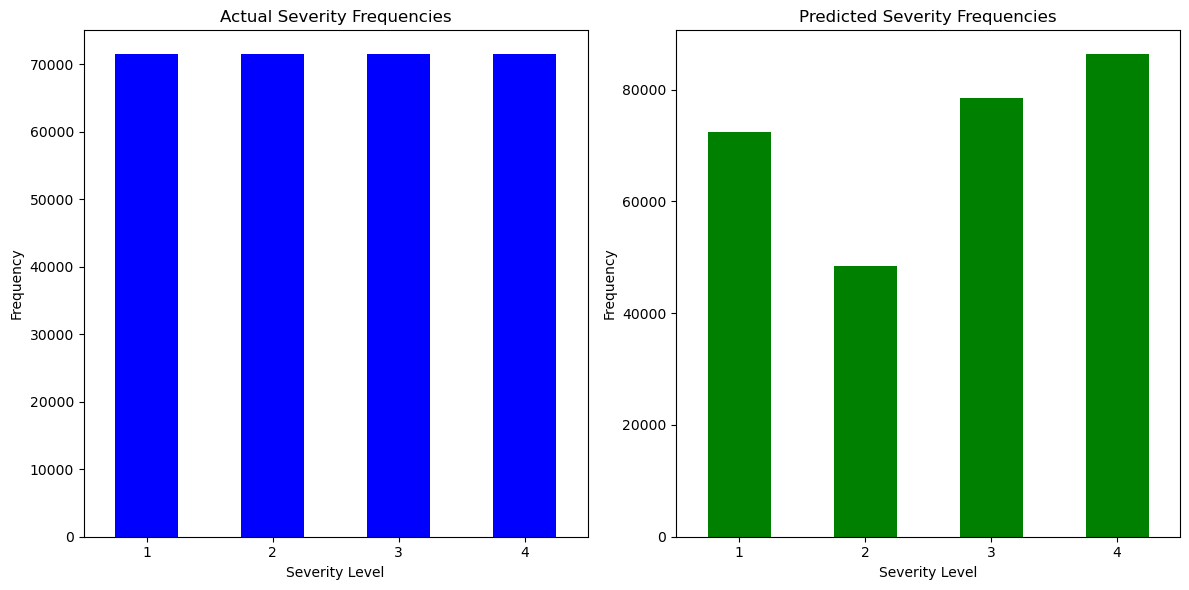

In [38]:
# Support Vector Machine

# Instantiate an object of class SVC()
clf = SVC(gamma='auto', kernel='rbf', random_state=42)

# Train & Test (limiting rows since SVM takes much time)
clf.fit(X_train[:10000], y_train[:10000])
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Support Vector Machine accuracy_score: {:.3f}.".format(accuracy_score(y_test, y_pred)))

# Generate frequency counts for actual Severity levels
actual_counts = pd.Series(y_test).value_counts().sort_index()

# Generate frequency counts for predicted Severity levels
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Plotting Actual Severity Frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
actual_counts.plot(kind='bar', color='blue')
plt.title('Actual Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plotting Predicted Severity Frequencies
plt.subplot(1, 2, 2)
predicted_counts.plot(kind='bar', color='green')
plt.title('Predicted Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Decision Tree Algorithm

Decision Tree accuracy_score: 0.920.


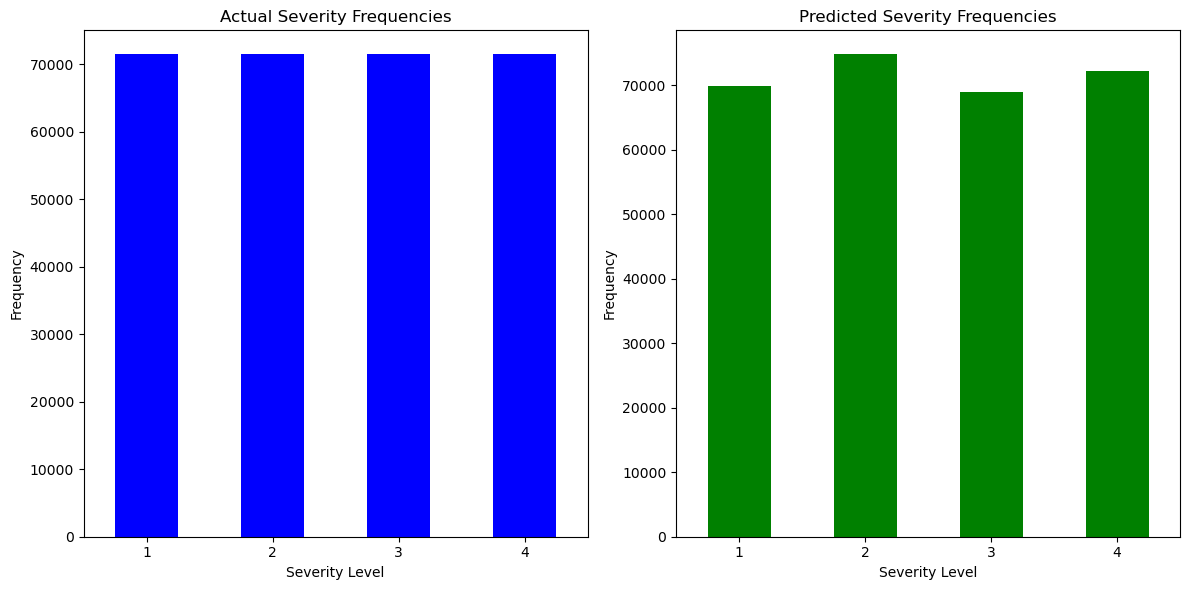

In [39]:
# Decision Tree Algorithm

# Instantiate a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train & Test
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

# Print accuracy_entropy
print('Decision Tree accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Generate frequency counts for actual Severity levels
actual_counts = pd.Series(y_test).value_counts().sort_index()

# Generate frequency counts for predicted Severity levels
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Plotting Actual Severity Frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
actual_counts.plot(kind='bar', color='blue')
plt.title('Actual Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plotting Predicted Severity Frequencies
plt.subplot(1, 2, 2)
predicted_counts.plot(kind='bar', color='green')
plt.title('Predicted Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Neural Network


For Training Dataset: Loss: 0.3764341175556183 and Accuracy: 0.8371481895446777

For Testing Dataset: Loss: 0.3871827721595764 and Accuracy: 0.8332942724227905
8933/8933 [==============================] - 8s 936us/step


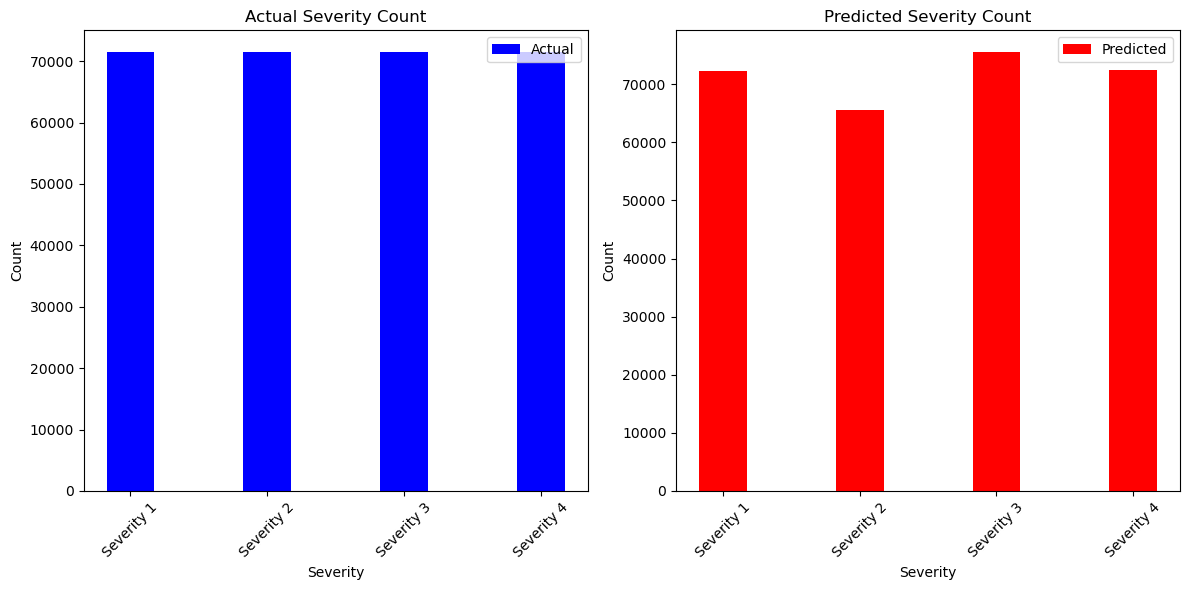

In [40]:
# Neural Network

model = Sequential()
model.add(Dense(128, input_dim=np.size(X_train,1), activation='relu'))
model.add(Dense(64, input_dim=np.size(X_train,1), activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# build the model
history = model.fit(X_train, to_categorical(y_train.to_numpy()), 
                    epochs=5, validation_data=(X_val, to_categorical(y_val.to_numpy())), 
                    validation_steps=30, verbose=0)


loss, train_accuracy = model.evaluate(X_train, to_categorical(y_train.to_numpy()), verbose=0)
print(f"\nFor Training Dataset: Loss: {loss} and Accuracy: {train_accuracy}")

loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test.to_numpy()), verbose=0)
print(f"\nFor Testing Dataset: Loss: {loss} and Accuracy: {test_accuracy}")

# stroring the accuracy score
result['Neural Network'] = ['Train: '+str(round(train_accuracy*100, 1))+', Test: '+str(round(test_accuracy*100,1))]

# Predicting the values for Test Dataset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Converting y_test to array
y_test_array = y_test.to_numpy()

# Count the frequency of each unique value in 'actual' and 'predicted'
actual_count = np.bincount(y_test_array)[1:]  # Remove the count of first severity level
predicted_count = np.bincount(y_pred_classes)[1:]  # Remove the count of first severity level

# Create an index array for plotting
index_labels = ['Severity {}'.format(i) for i in range(1, max(len(actual_count), len(predicted_count)) + 1)]

# Fill in the missing count with zeros
actual_count = np.concatenate([actual_count, np.zeros(len(index_labels) - len(actual_count))])
predicted_count = np.concatenate([predicted_count, np.zeros(len(index_labels) - len(predicted_count))])

# Plotting
plt.figure(figsize=(12, 6))

# First Bar plot for actual counts
plt.subplot(121)
plt.bar(index_labels, actual_count, 0.35, color='b', label='Actual')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Actual Severity Count')
plt.xticks(rotation=45)
plt.legend()

# Second Bar plot for predicted counts
plt.subplot(122)
plt.bar(index_labels, predicted_count, 0.35, color='r', label='Predicted')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Predicted Severity Count')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Building Model for California

In [41]:
# Deleting all data and reloading all the necessary libraries again

%reset -f

import pandas as pd
import numpy as np

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
result = {}
state='CA'
result['State']=state
processed_data = pd.read_csv(f'data_{state}.csv').dropna()
cols = processed_data.select_dtypes(include='object').columns

In [43]:
# Separate majority and minority classes
df_s1 = processed_data[processed_data['Severity']==1]
df_s2 = processed_data[processed_data['Severity']==2]
df_s3 = processed_data[processed_data['Severity']==3]
df_s4 = processed_data[processed_data['Severity']==4]

count = max(df_s1.count()[0], df_s2.count()[0], df_s3.count()[0], df_s4.count()[0])

# Upsample minority class
df_s1 = resample(df_s1, replace=df_s1.count()[0]<count, n_samples=count, random_state=42)
df_s2 = resample(df_s2, replace=df_s2.count()[0]<count, n_samples=count, random_state=42)
df_s3 = resample(df_s3, replace=df_s3.count()[0]<count, n_samples=count, random_state=42)
df_s4 = resample(df_s4, replace=df_s4.count()[0]<count, n_samples=count, random_state=42)
 
# Combine majority class with upsampled minority class
processed_data = pd.concat([df_s1, df_s2, df_s3, df_s4])
 
# Display new class counts
processed_data.groupby(by='Severity')['Severity'].count()

Severity
1    1383726
2    1383726
3    1383726
4    1383726
Name: Severity, dtype: int64

In [44]:
# Set the target for the prediction
target='Severity' 

# set X and y
y = processed_data[target]
X = processed_data.drop(target, axis=1)

# Create the encoder.
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split the data set into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

# Scalling the features of Train Dataset, Validation Dataset and Test Dataset
scaler = StandardScaler()

# Scaling Train Dataset
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Scaling Validation Dataset
scaler = scaler.fit(X_val)
X_val = scaler.transform(X_val)

# Scaling Test Dataset
scaler = scaler.fit(X_test)
X_test = scaler.transform(X_test)

### Support Vector Machine

Support Vector Machine accuracy_score: 0.711.


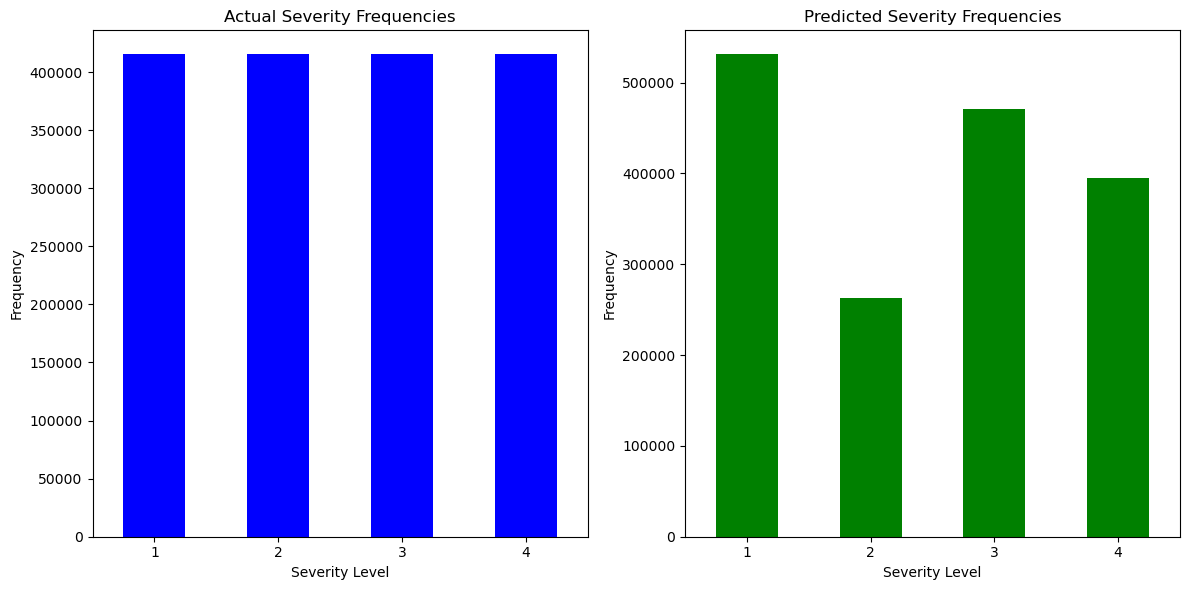

In [45]:
# Support Vector Machine

# Instantiate an object of class SVC()
clf = SVC(gamma='auto', kernel='rbf', random_state=42)

# Train & Test (limiting rows since SVM takes much time)
clf.fit(X_train[:10000], y_train[:10000])
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Support Vector Machine accuracy_score: {:.3f}.".format(accuracy_score(y_test, y_pred)))

# Generate frequency counts for actual Severity levels
actual_counts = pd.Series(y_test).value_counts().sort_index()

# Generate frequency counts for predicted Severity levels
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Plotting Actual Severity Frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
actual_counts.plot(kind='bar', color='blue')
plt.title('Actual Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plotting Predicted Severity Frequencies
plt.subplot(1, 2, 2)
predicted_counts.plot(kind='bar', color='green')
plt.title('Predicted Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Decision Tree Algorithm

Decision Tree accuracy_score: 0.901.


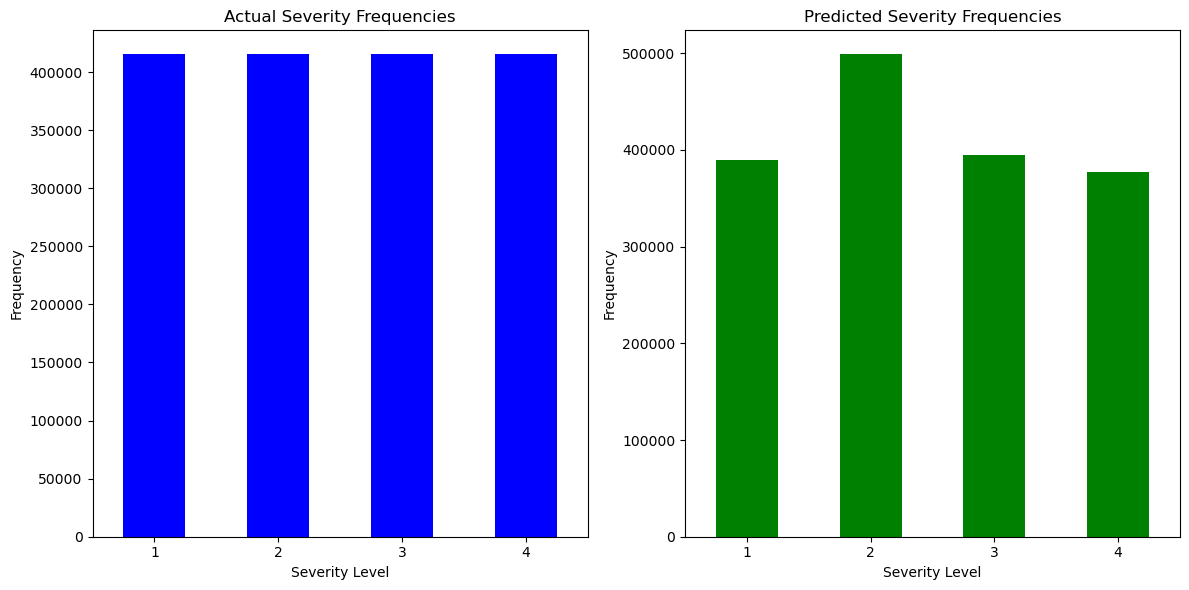

In [46]:
# Decision Tree Algorithm

# Instantiate a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train & Test
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

# Print accuracy_entropy
print('Decision Tree accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Generate frequency counts for actual Severity levels
actual_counts = pd.Series(y_test).value_counts().sort_index()

# Generate frequency counts for predicted Severity levels
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Plotting Actual Severity Frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
actual_counts.plot(kind='bar', color='blue')
plt.title('Actual Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plotting Predicted Severity Frequencies
plt.subplot(1, 2, 2)
predicted_counts.plot(kind='bar', color='green')
plt.title('Predicted Severity Frequencies')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Neural Network


For Training Dataset: Loss: 0.4261632263660431 and Accuracy: 0.8369331359863281

For Testing Dataset: Loss: 0.4300050437450409 and Accuracy: 0.8356828689575195
51890/51890 [==============================] - 47s 911us/step


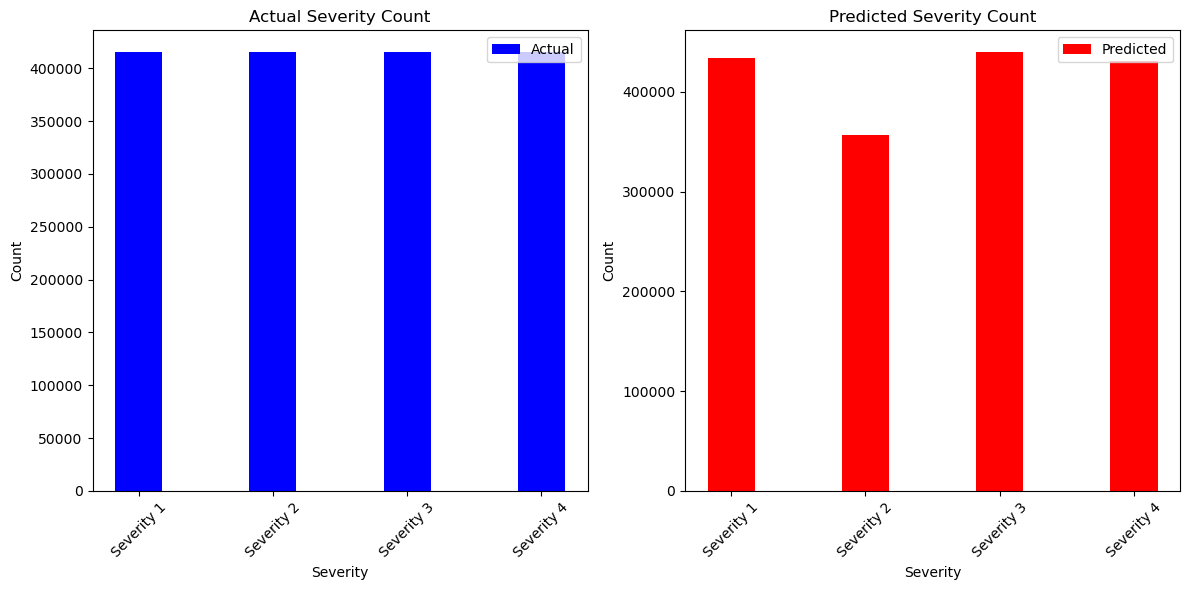

In [47]:
# Neural Network

model = Sequential()
model.add(Dense(128, input_dim=np.size(X_train,1), activation='relu'))
model.add(Dense(64, input_dim=np.size(X_train,1), activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# build the model
history = model.fit(X_train, to_categorical(y_train.to_numpy()), 
                    epochs=5, validation_data=(X_val, to_categorical(y_val.to_numpy())), 
                    validation_steps=30, verbose=0)


loss, train_accuracy = model.evaluate(X_train, to_categorical(y_train.to_numpy()), verbose=0)
print(f"\nFor Training Dataset: Loss: {loss} and Accuracy: {train_accuracy}")

loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test.to_numpy()), verbose=0)
print(f"\nFor Testing Dataset: Loss: {loss} and Accuracy: {test_accuracy}")

# stroring the accuracy score
result['Neural Network'] = ['Train: '+str(round(train_accuracy*100, 1))+', Test: '+str(round(test_accuracy*100,1))]

# Predicting the values for Test Dataset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Converting y_test to array
y_test_array = y_test.to_numpy()

# Count the frequency of each unique value in 'actual' and 'predicted'
actual_count = np.bincount(y_test_array)[1:]  # Remove the count of first severity level
predicted_count = np.bincount(y_pred_classes)[1:]  # Remove the count of first severity level

# Create an index array for plotting
index_labels = ['Severity {}'.format(i) for i in range(1, max(len(actual_count), len(predicted_count)) + 1)]

# Fill in the missing count with zeros
actual_count = np.concatenate([actual_count, np.zeros(len(index_labels) - len(actual_count))])
predicted_count = np.concatenate([predicted_count, np.zeros(len(index_labels) - len(predicted_count))])

# Plotting
plt.figure(figsize=(12, 6))

# First Bar plot for actual counts
plt.subplot(121)
plt.bar(index_labels, actual_count, 0.35, color='b', label='Actual')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Actual Severity Count')
plt.xticks(rotation=45)
plt.legend()

# Second Bar plot for predicted counts
plt.subplot(122)
plt.bar(index_labels, predicted_count, 0.35, color='r', label='Predicted')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Predicted Severity Count')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()